<a href="https://colab.research.google.com/github/hyunjae97/2023S-Ajou-ML/blob/main/COD_N_v0_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1.import library

In [ ]:
import os
import cv2
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
#from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
os.chdir('/content/drive/Shareddrives/기계학습/Unzip_TS')
os.listdir()

['medicine_all',
 'suhyeon',
 'nayoung',
 'hyunjae',
 'yunwook',
 'hyuntae',
 'kwanyong']

## 2.load data

In [ ]:
#!unzip -qq "/content/drive/Shareddrives/COD-N_suhyeon/medicine_all.zip"

In [ ]:
# 데이터 경로 설정
data_dir = '/content/drive/Shareddrives/기계학습/Unzip_TS/medicine_all'

In [ ]:
# 약 이름 딕셔너리 초기화
drug_names = {}

# 데이터 폴더 순회
for idx, label_name in enumerate(sorted(os.listdir(data_dir))):
    # 약 이름 딕셔너리에 약 이름과 인덱스 매핑
    drug_names[idx] = label_name

# 클래스 수 계산
num_classes = len(drug_names)

# 결과 출력
print('약 이름 딕셔너리:', drug_names)
print('클래스 수:', num_classes)

약 이름 딕셔너리: {0: 'model_1.h5', 1: '노바코트정', 2: '누제정', 3: '뉴에르도테캡슐', 4: '도네셉트정 5mg', 5: '돔프린', 6: '라노펜세미정', 7: '라보펜정', 8: '락토엔큐캡슐(바실루스리케니포르미스균)', 9: '레바코스', 10: '레보테놀정 12.5mg', 11: '레파드린정', 12: '로사르젠정', 13: '로자살탄플러스정(비매품)', 14: '록프로정', 15: '리셀톤캡슐6.0mg', 16: '멜로디핀', 17: '멜로캄캡슐', 18: '뮤코원캡슐(에르도스테인)', 19: '발렌시아연질캡슐', 20: '베아로탄정50mg', 21: '베아투스정', 22: '브롱코박솜캡슐 20mg (소아용)', 23: '비스론캡슐', 24: '비오메틱스캡슐(바실루스리케니포르미스균)', 25: '세크런캡슐', 26: '세토리드정', 27: '세파로캡슐', 28: '스파렌정', 29: '실론정237.5mg', 30: '아소틴', 31: '아제타민', 32: '알도스텐캡슐', 33: '알로탈정125mg', 34: '액시드캡슐', 35: '에비시펜정', 36: '에스티렌정', 37: '에페신SR정', 38: '에피나레정', 39: '옥시크로린정 150mg', 40: '위더렌정', 41: '진큐크린', 42: '징코멕

In [ ]:
# 이미지와 레이블을 저장할 리스트 생성
images = []
labels = []

# 데이터 불러오기
for label_idx, label_name in enumerate(os.listdir(data_dir)):
    label_dir = os.path.join(data_dir, label_name)
    for image_name in os.listdir(label_dir):
        image_path = os.path.join(label_dir, image_name)
        image = cv2.imread(image_path)
        image = cv2.resize(image, (64, 64))  # 이미지 크기 조정
        images.append(image)
        labels.append(label_idx)

NotADirectoryError: ignored

In [ ]:
import matplotlib.pyplot as plt

# 0번째 이미지와 레이블 출력
image = images[0]
label = labels[0]
drug_name = drug_names[label]

# 이미지 출력
plt.imshow(image)
plt.axis('off')
plt.show()

# 레이블 출력
print('레이블:', label)
print('약 이름:', drug_name)

## 3.pre-processing

In [ ]:
# NumPy 배열로 변환
images = np.array(images)
labels = np.array(labels)

# 훈련 세트와 테스트 세트로 데이터 분할
train_images, test_images, train_labels, test_labels = train_test_split(
    images, labels, test_size=0.2, random_state=42, stratify=labels)

# 데이터 전처리
train_images = train_images / 255.0
test_images = test_images / 255.0

## 4.modeling

In [ ]:
# 모델 생성
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
train_labels = np.eye(num_classes)[train_labels.squeeze()]
test_labels = np.eye(num_classes)[test_labels.squeeze()]

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(train_images, train_labels, epochs=20)

## 5.test

In [ ]:
# 테스트 데이터로 모델 평가
loss, accuracy = model.evaluate(test_images, test_labels)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

In [ ]:
test_labels[0]

1/1 [==============================] - 0s 31ms/step


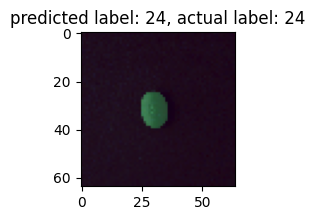

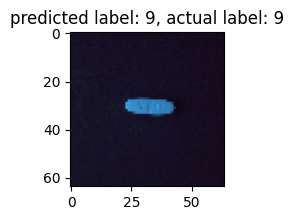

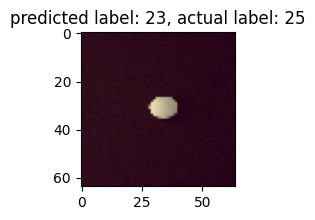

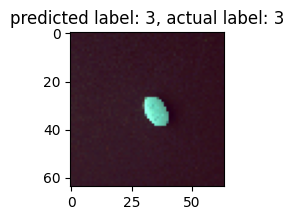

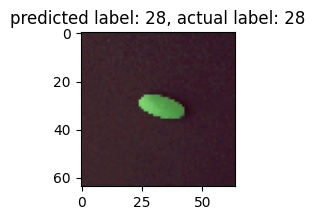

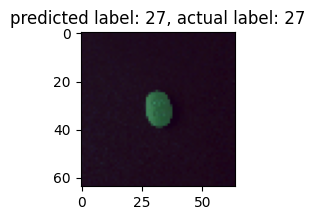

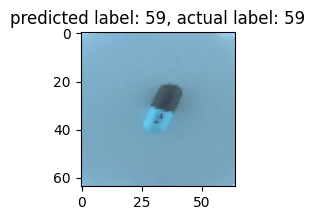

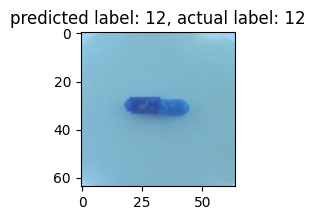

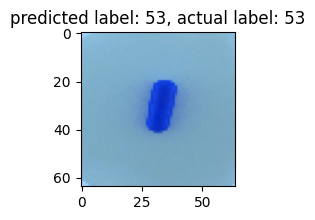

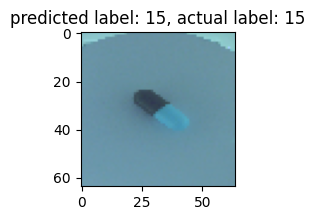

In [ ]:
import numpy as np

# 테스트 데이터에서 임의로 10개를 추출
random_indices = np.random.choice(test_images.shape[0], size=10, replace=False)
random_test_images = test_images[random_indices]
random_test_labels = test_labels[random_indices]

# 모델을 이용해 예측
predictions = model.predict(random_test_images)

# 가장 높은 확률의 클래스를 선택
predicted_labels = np.argmax(predictions, axis=1)
real_labels = np.argmax(random_test_labels, axis=1)

# 예측한 라벨과 실제 라벨, 그리고 이미지를 출력
for i in range(10):
    plt.figure(figsize=(2,2))
    plt.imshow(random_test_images[i], cmap='gray') # 이미지 출력
    plt.title(f'predicted label: {predicted_labels[i]}, actual label: {real_labels[i]}')
    plt.show()


In [ ]:
# 특정 인덱스의 약 이름 찾기
index = 12
drug_name = drug_names[index]

# 약 이름 출력
print(f'인덱스 {index}의 약 이름: {drug_name}')

인덱스 12의 약 이름: 로자살탄플러스정(비매품)


## 6.API connection

In [ ]:
import requests
from bs4 import BeautifulSoup

# 특정 인덱스의 약 이름 찾기
index = 11
drug_name = drug_names[index]

# API 호출을 위한 설정
url = 'http://apis.data.go.kr/1471000/DrbEasyDrugInfoService/getDrbEasyDrugList'
params ={'serviceKey' : 'r5vBOAfbaYxbImO/qoHlkIK0ngK+17AEp0JAkC0va1Sg2kr4z1HX6/GXKZfpr1R3To5fE6UBXl2jiVbpcMT6rA==', 'itemName' : '','type' : 'xml'}

# API 호출
response = requests.get(url, params=params)

# XML 파싱
soup = BeautifulSoup(response.text, "html.parser")

In [ ]:
import requests
from bs4 import BeautifulSoup

# 특정 인덱스의 약 이름 찾기
index = 11
drug_name = drug_names[index]

url = 'http://apis.data.go.kr/1471000/MdcinGrnIdntfcInfoService01/getMdcinGrnIdntfcInfoList01'
params ={'serviceKey' : 'r5vBOAfbaYxbImO/qoHlkIK0ngK+17AEp0JAkC0va1Sg2kr4z1HX6/GXKZfpr1R3To5fE6UBXl2jiVbpcMT6rA==', 'item_name' : '', 'type' : 'xml' }

response = requests.get(url, params=params)
# XML 파싱
soup = BeautifulSoup(response.text, "html.parser")

In [ ]:
import requests

url = 'http://apis.data.go.kr/1471000/QdrgPrdtPrmsnInfoService01?_wadl'
params = {
    'serviceKey': 'r5vBOAfbaYxbImO/qoHlkIK0ngK+17AEp0JAkC0va1Sg2kr4z1HX6/GXKZfpr1R3To5fE6UBXl2jiVbpcMT6rA==',
    'pageNo': '1',
    'numOfRows': '10',
}

response = requests.get(url, params=params)
data = response.json()

items = data['getQdrgPrdtPrmsnInfoInq02-01-body']['items']['getQdrgPrdtPrmsnInfoInq02-01-item']

for item in items:
    item_seq = item['ITEM_SEQ']
    item_name = item['ITEM_NAME']
    entp_name = item['ENTP_NAME']
    item_permit_date = item['ITEM_PERMIT_DATE']
    item_no = item['ITEM_NO']
    cancel_code_name = item['CANCEL_CODE_NAME']
    cancel_date = item['CANCEL_DATE']
    main_ingr = item['MAIN_INGR']
    adit_ingr = item['ADIT_INGR']
    class_no = item['CLASS_NO']
    class_no_name = item['CLASS_NO_NAME']
    permit_kind_code_nm = item['PERMIT_KIND_CODE_NM']
    induty_code = item['INDUTY_CODE']
    manuf_country_names = item['MANUF_COUNTRY_NAMES']
    ee_doc_data = item['EE_DOC_DATA']
    ud_doc_data = item['UD_DOC_DATA']
    nb_doc_data = item['NB_DOC_DATA']
    entp_no = item['ENTP_NO']
    entp_seq = item['ENTP_SEQ']

    print('약품 정보:')
    print('품목기준코드:', item_seq)
    print('제품명:', item_name)
    print('업체명:', ent


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/requests/models.py", line 910, in json
    return complexjson.loads(self.text, **kwargs)
  File "/usr/lib/python3.10/json/__init__.py", line 346, in loads
    return _default_decoder.decode(s)
  File "/usr/lib/python3.10/json/decoder.py", line 337, in decode
    obj, end = self.raw_decode(s, idx=_w(s, 0).end())
  File "/usr/lib/python3.10/json/decoder.py", line 355, in raw_decode
    raise JSONDecodeError("Expecting value", s, err.value) from None
json.decoder.JSONDecodeError: Expecting value: line 1 column 1 (char 0)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-141-71c5a3f8a429>", line 11, in <cell line: 11>
    data = response.json()
  File "/usr/local/lib/python3

In [1]:
import requests

url = 'http://apis.data.go.kr/1471000/DrbEasyDrugInfoService/getDrbEasyDrugList'
params ={'serviceKey' : 'r5vBOAfbaYxbImO/qoHlkIK0ngK+17AEp0JAkC0va1Sg2kr4z1HX6/GXKZfpr1R3To5fE6UBXl2jiVbpcMT6rA==', 'pageNo' : '1', 'numOfRows' : '3', 'entpName' : '', 'itemName' : '', 'itemSeq' : '',
         'efcyQesitm' : '', 'useMethodQesitm' : '', 'atpnWarnQesitm' : '', 'atpnQesitm' : '', 'intrcQesitm' : '', 'seQesitm' : '', 'depositMethodQesitm' : '', 'openDe' : '', 'updateDe' : '', 'type' : 'xml' }

response = requests.get(url, params=params)
print(response.text)

<?xml version="1.0" encoding="UTF-8"?>
<response>
<header>
<resultCode>00</resultCode>
<resultMsg>NORMAL SERVICE.</resultMsg>
</header>
<body>
<numOfRows>3</numOfRows>
<pageNo>1</pageNo>
<totalCount>4446</totalCount>
<items>
<item>
<entpName>동화약품(주)</entpName>
<itemName>활명수</itemName>
<itemSeq>195700020</itemSeq>
<efcyQesitm>&lt;p&gt;이 약은 식욕감퇴(식욕부진), 위부팽만감, 소화불량, 과식, 체함, 구역, 구토에 사용합니다.&lt;/p&gt;
</efcyQesitm>
<useMethodQesitm>&lt;p&gt;만 15세 이상 및 성인은 1회 1병(75 mL), 만 11세이상~만 15세미만은 1회 &lt;sup&gt;2&lt;/sup&gt;/&lt;sub&gt;3&lt;/sub&gt;병(50 mL), 만 8세 이상~만 11세 미만은 1회 &lt;sup&gt;1&lt;/sup&gt;/&lt;sub&gt;2&lt;/sub&gt;병(37.5 mL), 만 5세 이상~만 8세 미만은 1회 &lt;sup&gt;1&lt;/sup&gt;/&lt;sub&gt;3&lt;/sub&gt;병(25 mL), 만 3세 이상~만 5세 미만은 1회 &lt;sup&gt;1&lt;/sup&gt;/&lt;sub&gt;4&lt;/sub&gt;병(18.75 mL), 만 1세 이상~만 3세 미만은 1회 &lt;sup&gt;1&lt;/sup&gt;/&lt;sub&gt;5&lt;/sub&gt;병(15 mL), 1일 3회 식후에 복용합니다. 복용간격은 4시간 이상으로 합니다.&lt;/p&gt;
</useMethodQesitm>
<atpnWarnQesitm/>
<atpnQesitm>&lt;p&gt;만 3개월 미만의 젖먹이는 이 약을 복용하지 마